# Step 1: Import necessary libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Step 2: Load the California Housing Prices dataset


In [2]:
california_housing = fetch_california_housing()
print(california_housing.feature_names)
print(california_housing.target_names)
print(california_housing.data)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedHouseVal']
[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [3]:
# Create a DataFrame from the dataset
# data = pd.DataFrame(data=np.c_[california_housing['data'], california_housing['target']],
#                     columns=california_housing['feature_names'] + ['target'])


In [4]:
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
t_name = california_housing.target_names[0]
data[t_name] = california_housing.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
# Extract the features (X) and target (y)
X = data.drop("MedHouseVal", axis=1)
y = data["MedHouseVal"]


# Step 3: Data Splitting


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 4: Linear Regression Modeling


In [7]:
# Create a Linear Regression model
model = LinearRegression()

In [8]:
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

# Step 5: Model Evaluation


In [9]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [10]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)


In [11]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

In [12]:
# Calculate R-squared (R²) score
r2 = r2_score(y_test, y_pred)

# Step 6: Results


In [13]:
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R²) Score: {r2:.2f}')

Mean Absolute Error (MAE): 0.53
Mean Squared Error (MSE): 0.56
R-squared (R²) Score: 0.58


# Step 7: Visualization


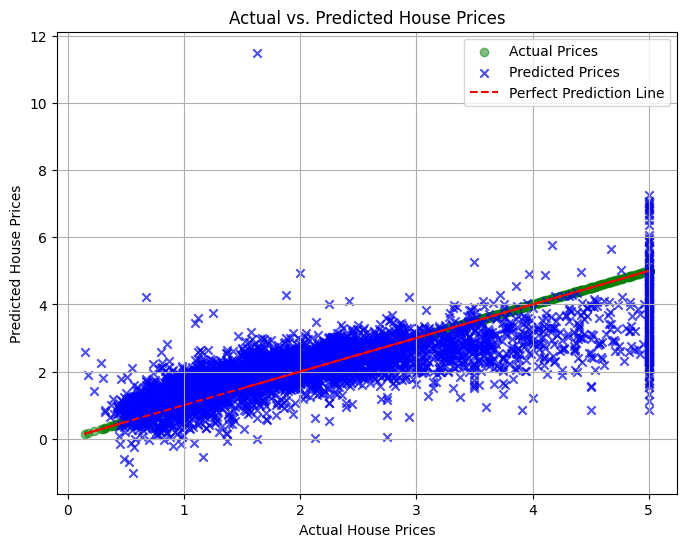

In [16]:
# Visualize the actual vs. predicted house prices using a scatterplot
plt.figure(figsize=(8, 6))
# Scatterplot of actual house prices
plt.scatter(y_test, y_test, color='green', alpha=0.5, label='Actual Prices', marker='o')
# Scatterplot of predicted house prices
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predicted Prices', marker='x')
# Plot a 45-degree line to represent perfect predictions where predicted equals actual
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction Line')
# Label the x-axis as 'Actual House Prices'
plt.xlabel('Actual House Prices')
# Label the y-axis as 'Predicted House Prices'
plt.ylabel('Predicted House Prices')
# Add a title to the plot
plt.title('Actual vs. Predicted House Prices')
# Add a grid to the plot for better readability
plt.grid(True)
# Add a legend to differentiate between actual and predicted prices
plt.legend()
# Display the plot
plt.show()